Berkeley ML/AI Course -- Practical Exercise 2
What factors make a car more or less expensive; what consumers value in a used car
Provide clear recommendations to your client — a used car dealership

In [79]:
import numpy as np
import pandas as pd

In [80]:
df = pd.read_csv('vehicles.csv')

In [81]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [82]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [84]:
# drop NaN values
df_filtered = df.dropna()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2), obj

In [85]:
# Explore unique values for columns of the dataframe
print(df_filtered.value_counts('price'))

price
0         2372
1          683
9995       373
6995       372
7995       366
          ... 
19899        1
19898        1
19895        1
5745         1
155000       1
Name: count, Length: 3136, dtype: int64


In [86]:
# drop rows for which price = 0
# observations with price = 0 are unhelpful to the analysis
df_filtered = df_filtered[df_filtered['price'] != 0]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32496 entries, 215 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32496 non-null  int64  
 1   region        32496 non-null  object 
 2   price         32496 non-null  int64  
 3   year          32496 non-null  float64
 4   manufacturer  32496 non-null  object 
 5   model         32496 non-null  object 
 6   condition     32496 non-null  object 
 7   cylinders     32496 non-null  object 
 8   fuel          32496 non-null  object 
 9   odometer      32496 non-null  float64
 10  title_status  32496 non-null  object 
 11  transmission  32496 non-null  object 
 12  VIN           32496 non-null  object 
 13  drive         32496 non-null  object 
 14  size          32496 non-null  object 
 15  type          32496 non-null  object 
 16  paint_color   32496 non-null  object 
 17  state         32496 non-null  object 
dtypes: float64(2), int64(2), obj

In [87]:
print(df_filtered.value_counts('year'))
# Drop rows for cars more than 45 years old
# 45 years is the general cutoff for an "antique" car
# Antique cars are a special case of used cars, like an outlier for a typical used car dealer
# max_value = df[year].max()
# threshold = max_value - amount_less_than_max
df_filtered = df_filtered[df_filtered['year'] >= (df['year'].max() - 45)]
df_filtered.value_counts('year')
df_filtered.info()

year
2013.0    2818
2015.0    2640
2014.0    2596
2016.0    2356
2012.0    2336
          ... 
1937.0       1
1936.0       1
1933.0       1
1931.0       1
2022.0       1
Name: count, Length: 89, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 32231 entries, 215 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32231 non-null  int64  
 1   region        32231 non-null  object 
 2   price         32231 non-null  int64  
 3   year          32231 non-null  float64
 4   manufacturer  32231 non-null  object 
 5   model         32231 non-null  object 
 6   condition     32231 non-null  object 
 7   cylinders     32231 non-null  object 
 8   fuel          32231 non-null  object 
 9   odometer      32231 non-null  float64
 10  title_status  32231 non-null  object 
 11  transmission  32231 non-null  object 
 12  VIN           32231 non-null  object 
 13  drive         32231 non-null  objec

In [88]:
# Drop VIN; no clear way to show relationship with the vehicle's value
df_filtered.drop('VIN', axis=1, inplace=True)

In [89]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32231 entries, 215 to 426833
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32231 non-null  int64  
 1   region        32231 non-null  object 
 2   price         32231 non-null  int64  
 3   year          32231 non-null  float64
 4   manufacturer  32231 non-null  object 
 5   model         32231 non-null  object 
 6   condition     32231 non-null  object 
 7   cylinders     32231 non-null  object 
 8   fuel          32231 non-null  object 
 9   odometer      32231 non-null  float64
 10  title_status  32231 non-null  object 
 11  transmission  32231 non-null  object 
 12  drive         32231 non-null  object 
 13  size          32231 non-null  object 
 14  type          32231 non-null  object 
 15  paint_color   32231 non-null  object 
 16  state         32231 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 4.4+ MB


In [90]:
# drop any row that has "missing" as a value in a column
df_filtered = df_filtered[~df_filtered.isin(['missing']).any(axis=1)]

In [91]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32222 entries, 215 to 426833
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32222 non-null  int64  
 1   region        32222 non-null  object 
 2   price         32222 non-null  int64  
 3   year          32222 non-null  float64
 4   manufacturer  32222 non-null  object 
 5   model         32222 non-null  object 
 6   condition     32222 non-null  object 
 7   cylinders     32222 non-null  object 
 8   fuel          32222 non-null  object 
 9   odometer      32222 non-null  float64
 10  title_status  32222 non-null  object 
 11  transmission  32222 non-null  object 
 12  drive         32222 non-null  object 
 13  size          32222 non-null  object 
 14  type          32222 non-null  object 
 15  paint_color   32222 non-null  object 
 16  state         32222 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 4.4+ MB


In [92]:
df_filtered['fuel'].value_counts()

# drop rows that list "other" for fuel type
df_filtered = df_filtered[df_filtered['fuel'] != 'other']
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32192 entries, 215 to 426833
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32192 non-null  int64  
 1   region        32192 non-null  object 
 2   price         32192 non-null  int64  
 3   year          32192 non-null  float64
 4   manufacturer  32192 non-null  object 
 5   model         32192 non-null  object 
 6   condition     32192 non-null  object 
 7   cylinders     32192 non-null  object 
 8   fuel          32192 non-null  object 
 9   odometer      32192 non-null  float64
 10  title_status  32192 non-null  object 
 11  transmission  32192 non-null  object 
 12  drive         32192 non-null  object 
 13  size          32192 non-null  object 
 14  type          32192 non-null  object 
 15  paint_color   32192 non-null  object 
 16  state         32192 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 4.4+ MB


In [93]:
df_filtered['title_status'].value_counts()

# drop rows for values other than "clean" and "rebuilt" for title status
df_filtered = df_filtered[df_filtered['title_status'].str.contains('clean|rebuilt', case=False, na=False)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31821 entries, 215 to 426833
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            31821 non-null  int64  
 1   region        31821 non-null  object 
 2   price         31821 non-null  int64  
 3   year          31821 non-null  float64
 4   manufacturer  31821 non-null  object 
 5   model         31821 non-null  object 
 6   condition     31821 non-null  object 
 7   cylinders     31821 non-null  object 
 8   fuel          31821 non-null  object 
 9   odometer      31821 non-null  float64
 10  title_status  31821 non-null  object 
 11  transmission  31821 non-null  object 
 12  drive         31821 non-null  object 
 13  size          31821 non-null  object 
 14  type          31821 non-null  object 
 15  paint_color   31821 non-null  object 
 16  state         31821 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 4.4+ MB


In [94]:
df_filtered['transmission'].value_counts()

# drop rows for transmission = other
df_filtered = df_filtered[df_filtered['transmission'] != 'other']
df_filtered['transmission'].value_counts()

transmission
automatic    29614
manual        1524
Name: count, dtype: int64

In [95]:
df_filtered['drive'].value_counts()

drive
4wd    14533
fwd    10197
rwd     6408
Name: count, dtype: int64

In [96]:
df_filtered['size'].value_counts()

size
full-size      18542
mid-size        8617
compact         3407
sub-compact      572
Name: count, dtype: int64

In [97]:
df_filtered['type'].value_counts()

type
SUV            8432
sedan          7451
truck          6734
pickup         2509
van            1613
coupe          1195
hatchback      1047
convertible     720
wagon           657
mini-van        586
other            80
offroad          75
bus              39
Name: count, dtype: int64

In [98]:
df_filtered['paint_color'].value_counts()

paint_color
white     8714
black     5759
silver    4300
grey      3823
blue      3012
red       2814
custom     823
green      796
brown      707
yellow     194
orange     130
purple      66
Name: count, dtype: int64

In [99]:
df_filtered['state'].value_counts()

# divide into winter and not_winter categories
# 20 coldest states by average low temperature
cold_states = ['ak', 'nd', 'mn', 'me', 'vt', 'wy', 'mt', 'wi', 'nh', 'sd', 'id', 'mi', 
               'co', 'ut', 'ne', 'ny', 'ma', 'pa', 'or', 'wa']

# Create a new column for categories and initialize with a default value
df['state_split'] = 'Other'

# Iterate through the DataFrame rows and assign categories
for index, row in df_filtered.iterrows():
    if row['state'] in cold_states:
        df_filtered.loc[index, 'state_split'] = 'colder_state'
    else:
        df_filtered.loc[index, 'state_split'] = 'warmer_state'

df_filtered.tail()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,state_split
426785,7303314912,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy,colder_state
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy,colder_state
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy,colder_state
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy,colder_state
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy,colder_state


In [100]:
df_filtered['condition'].value_counts()

# drop rows with condition = salvage to be consistent with other columns
df_filtered = df_filtered[df_filtered['condition'] != 'salvage']

df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 31124 entries, 215 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            31124 non-null  int64  
 1   region        31124 non-null  object 
 2   price         31124 non-null  int64  
 3   year          31124 non-null  float64
 4   manufacturer  31124 non-null  object 
 5   model         31124 non-null  object 
 6   condition     31124 non-null  object 
 7   cylinders     31124 non-null  object 
 8   fuel          31124 non-null  object 
 9   odometer      31124 non-null  float64
 10  title_status  31124 non-null  object 
 11  transmission  31124 non-null  object 
 12  drive         31124 non-null  object 
 13  size          31124 non-null  object 
 14  type          31124 non-null  object 
 15  paint_color   31124 non-null  object 
 16  state         31124 non-null  object 
 17  state_split   31124 non-null  object 
dtypes: float64(2), int64(2), obj

In [101]:
df_filtered['cylinders'].value_counts()

# drop rows for cylinders = other
df_filtered = df_filtered[df_filtered['cylinders'] != 'other']

In [102]:
# drop rows for vehicles which would not normally be sold by a used car dealership
# harley-davidson in manufacturer, bus in type

df_filtered = df_filtered[df_filtered['manufacturer'] != 'harley-davidson']
df_filtered = df_filtered[df_filtered['type'] != 'bus']

# Remove rows with outliers for odometer (more than 150,000 miles)
df_filtered = df_filtered[df_filtered['odometer'] <= 150000]

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24328 entries, 219 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            24328 non-null  int64  
 1   region        24328 non-null  object 
 2   price         24328 non-null  int64  
 3   year          24328 non-null  float64
 4   manufacturer  24328 non-null  object 
 5   model         24328 non-null  object 
 6   condition     24328 non-null  object 
 7   cylinders     24328 non-null  object 
 8   fuel          24328 non-null  object 
 9   odometer      24328 non-null  float64
 10  title_status  24328 non-null  object 
 11  transmission  24328 non-null  object 
 12  drive         24328 non-null  object 
 13  size          24328 non-null  object 
 14  type          24328 non-null  object 
 15  paint_color   24328 non-null  object 
 16  state         24328 non-null  object 
 17  state_split   24328 non-null  object 
dtypes: float64(2), int64(2), obj

In [103]:
# create new variable to condense manufacturer into four categories
# America, Europe, Japan, Korea
manufacturer_split_list = []
for i in df_filtered['manufacturer']:
    if i == "hyundai" or i == 'kia':
        manufacturer_split_list.append('Korea')
    elif i=='toyota' or i=='honda' or i=='nissan' or i=='subaru' or i=='lexus' or i=='mazda' or i=='mitsubishi' or i=='acura' or i=='infiniti':
        manufacturer_split_list.append('Japan')
    elif i=='bmw' or i=='mercedes-benz' or i=='volkswagen' or i=='audi' or i=='volvo' or i=='mini' or i=='rover' or i=='porsche' or i=='land rover' or i=='jaguar' or i=='fiat'or i=='alfa-romeo' or i=='ferrari' or i=='aston-martin':
        manufacturer_split_list.append('Europe')
    else:
        manufacturer_split_list.append('America')
df_filtered = df_filtered.assign(manufacturer_split = manufacturer_split_list)

df_filtered['manufacturer_split'].value_counts()

manufacturer_split
America    14035
Japan       6163
Europe      3031
Korea       1099
Name: count, dtype: int64

In [104]:
# create new variable to condense condition into two categories
# new_excellent and good_fair
condition_split_list = []
for i in df_filtered['condition']:
    if i == "excellent" or i == 'like new' or i=='new':
        condition_split_list.append('new_excellent')
    else:
        condition_split_list.append('good_fair')
df_filtered = df_filtered.assign(condition_split = condition_split_list)

df_filtered['condition_split'].value_counts()

condition_split
new_excellent    17557
good_fair         6771
Name: count, dtype: int64

In [105]:
# drop offroad and other in type column
df_filtered = df_filtered[df_filtered['type'] != 'other']
df_filtered = df_filtered[df_filtered['type'] != 'offroad']

# create new variable to condense type into 5 categories
# suv sedan truck van other
type_split_list = []
for i in df_filtered['type']:
    if i == 'SUV':
        type_split_list.append('suv')
    elif i == 'sedan':
       type_split_list.append('sedan')
    elif i == 'truck' or i=='pickup':
        type_split_list.append('truck')
    elif i == 'van' or i=='mini-van':
        type_split_list.append('van')
    else:
       type_split_list.append('other')
df_filtered = df_filtered.assign(type_split = type_split_list)

df_filtered['type_split'].value_counts()

type_split
truck    6692
suv      6560
sedan    6232
other    3039
van      1679
Name: count, dtype: int64

In [106]:
# create new variable to condense paint_color into 4  categories
# white black silver_grey other
paint_split_list = []
for i in df_filtered['paint_color']:
    if i == 'white':
        paint_split_list.append('white')
    elif i == 'black':
       paint_split_list.append('black')
    elif i == 'silver' or i=='grey':
        paint_split_list.append('silver_grey')
    else:
       paint_split_list.append('other')
df_filtered = df_filtered.assign(paint_split = paint_split_list)

df_filtered['paint_split'].value_counts()

df_filtered.reset_index()

,index,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,drive,size,type,paint_color,state,state_split,manufacturer_split,condition_split,type_split,paint_split
0,219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,...,rwd,mid-size,sedan,white,al,warmer_state,Europe,good_fair,sedan,white
1,268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,...,rwd,compact,convertible,white,al,warmer_state,Japan,new_excellent,other,white
2,346,7315259946,birmingham,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,...,rwd,mid-size,convertible,red,al,warmer_state,Europe,good_fair,other,other
3,355,7315110575,birmingham,9400,2008.0,mercedes-benz,benz c350,good,6 cylinders,gas,...,rwd,full-size,sedan,silver,al,warmer_state,Europe,good_fair,sedan,silver_grey
4,365,7314956487,birmingham,72900,2021.0,chevrolet,tahoe,good,8 cylinders,gas,...,4wd,full-size,SUV,grey,al,warmer_state,America,good_fair,suv,silver_grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24197,426784,7303328776,wyoming,24995,2014.0,gmc,sierra,good,8 cylinders,gas,...,4wd,full-size,truck,white,wy,colder_state,America,good_fair,truck,white
24198,426785,7303314912,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,...,4wd,full-size,truck,black,wy,colder_state,America,new_excellent,truck,black
24199,426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,...,fwd,compact,sedan,silver,wy,colder_state,America,new_excellent,sedan,silver_grey
24200,426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,...,fwd,mid-size,sedan,black,wy,colder_state,America,new_excellent,sedan,black


In [107]:
# create dummy variables; one-hot encoding
# condition_split, paint_split, type_split, state_split, manufacturer_split, transmission, drive, fuel

from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['condition_split', 'paint_split',
    'type_split', 'state_split', 'manufacturer_split', 'transmission', 'drive',
    'fuel']
df_categorical = df_filtered[categorical_columns]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for dense array
encoder.fit(df_categorical)
encoded_data = encoder.transform(df_categorical)
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
df_filtered_encoded = pd.DataFrame(encoded_data, columns=encoded_column_names, index=df_filtered.index)

# Integrate with original DataFrame
df_encoded_final = pd.concat([df_filtered, df_filtered_encoded], axis=1)

df_encoded_final.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,manufacturer_split_Korea,transmission_automatic,transmission_manual,drive_4wd,drive_fwd,drive_rwd,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
346,7315259946,birmingham,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,20187.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
355,7315110575,birmingham,9400,2008.0,mercedes-benz,benz c350,good,6 cylinders,gas,129473.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
365,7314956487,birmingham,72900,2021.0,chevrolet,tahoe,good,8 cylinders,gas,19129.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


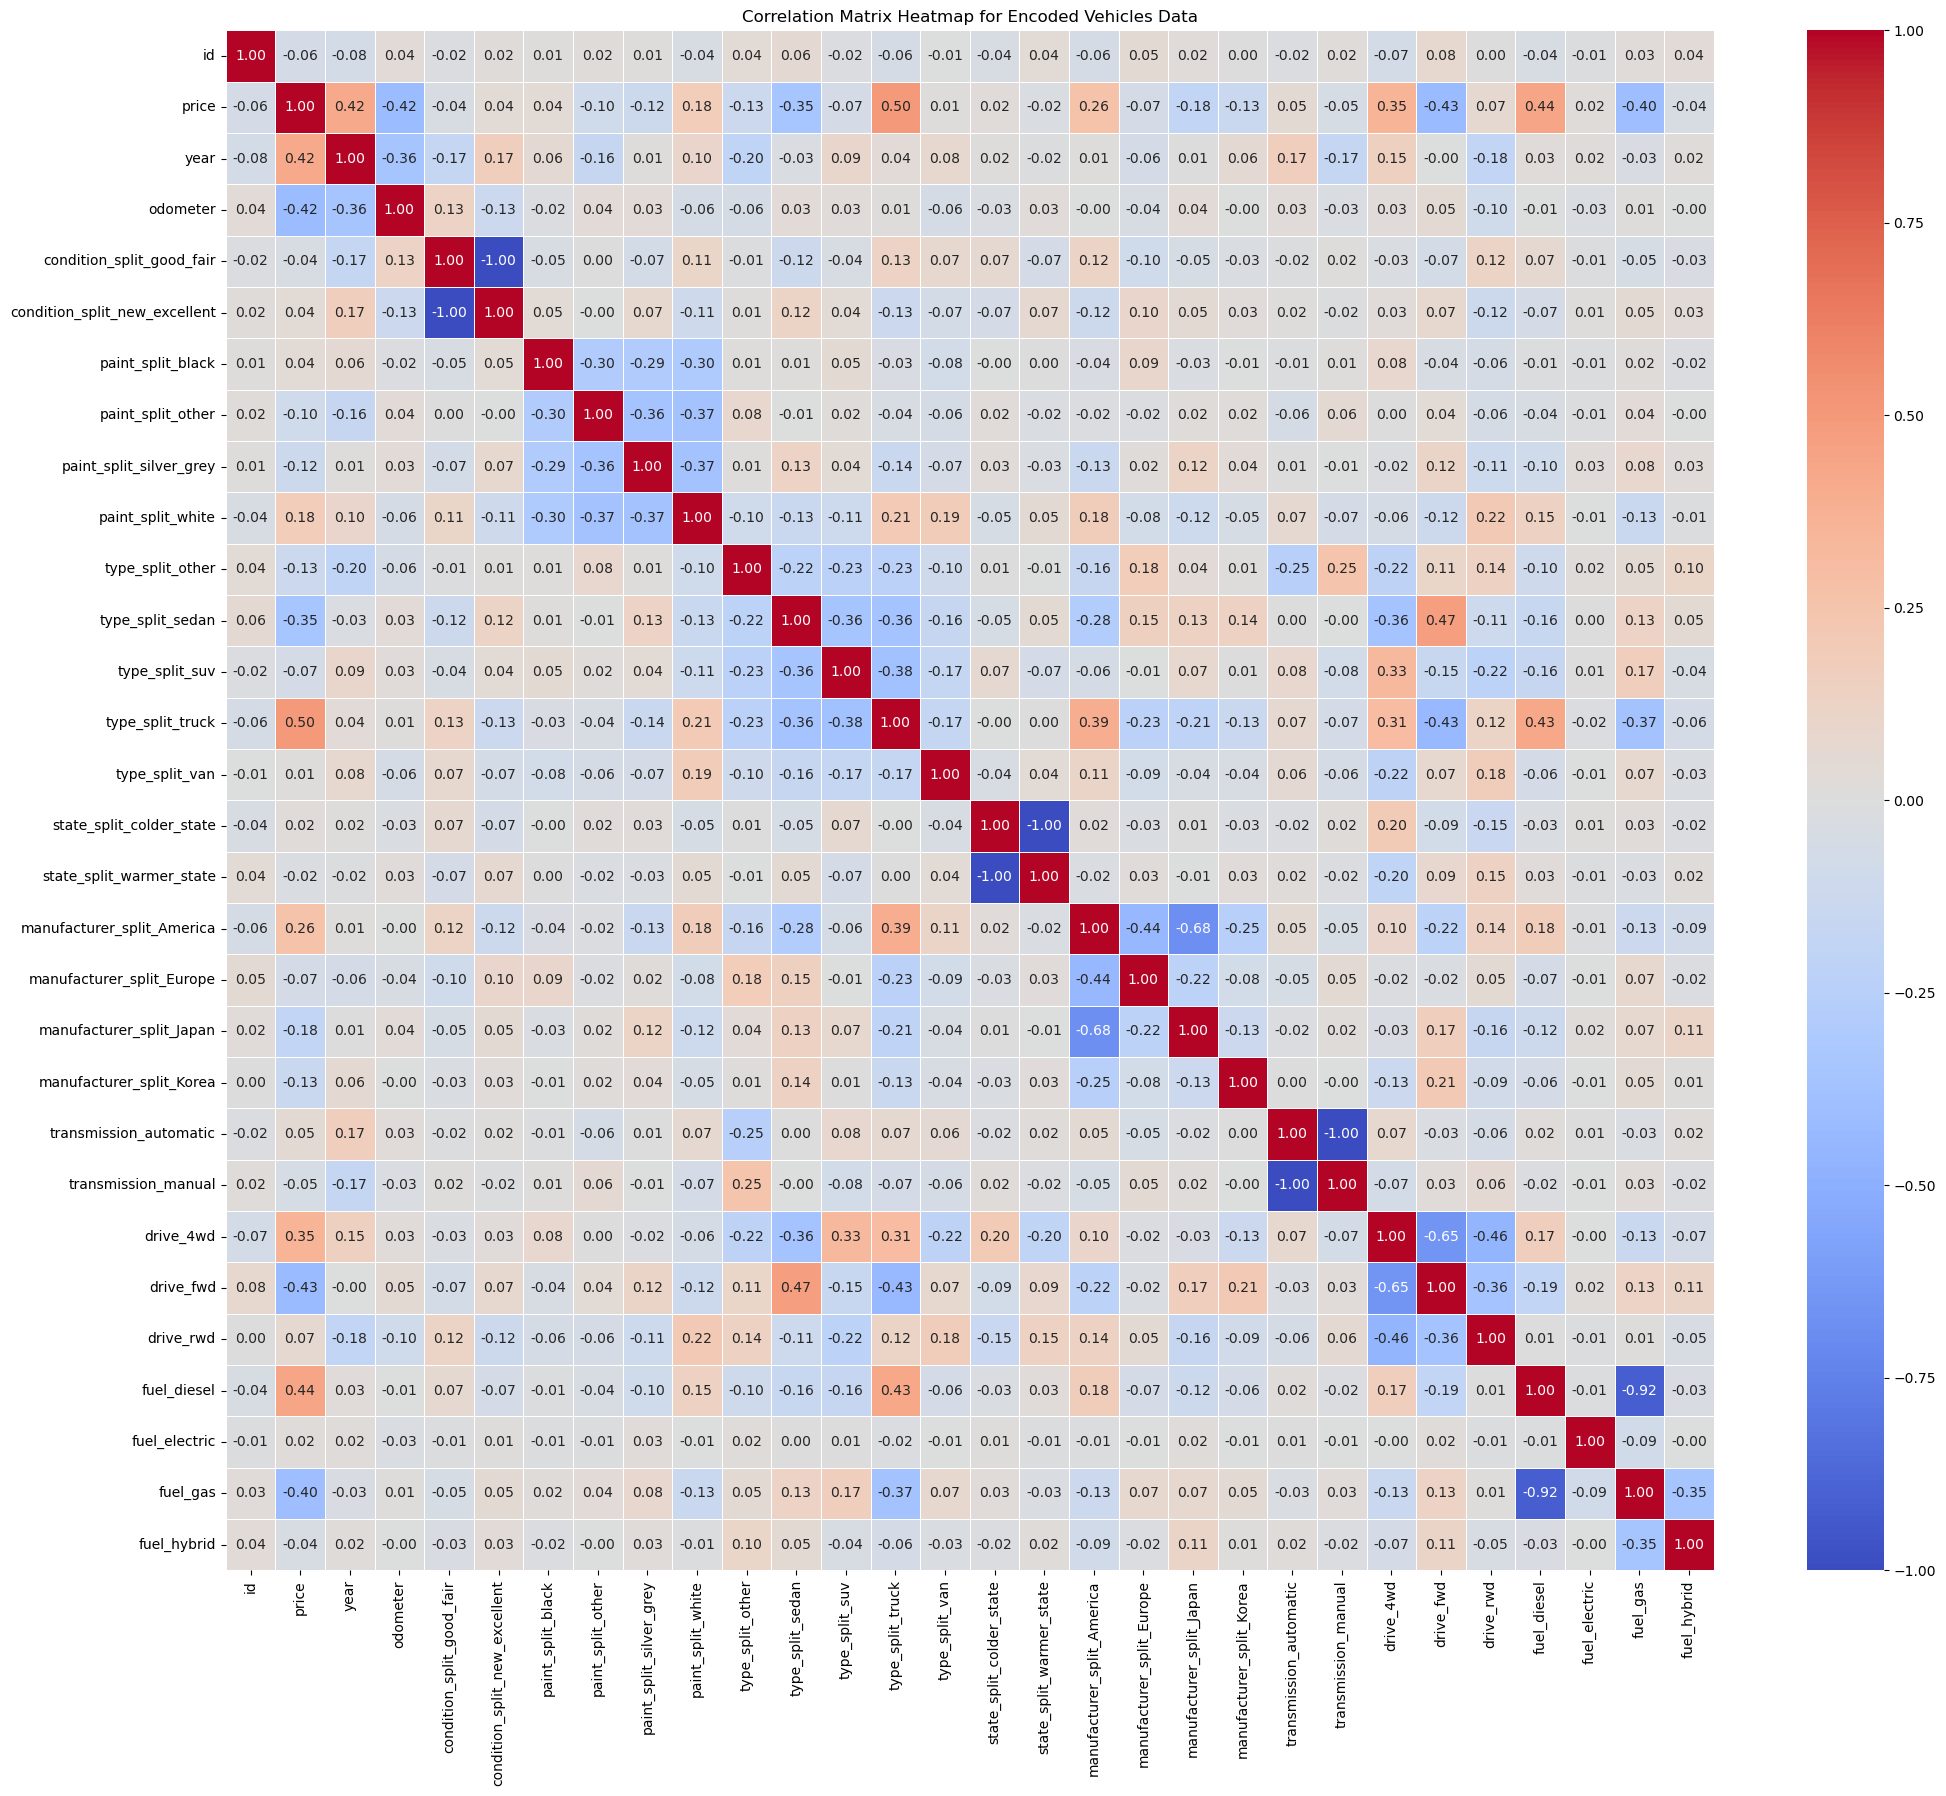

<Figure size 640x480 with 0 Axes>

In [108]:
# Explore relationships between variables using correlations

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_encoded_final.corr(numeric_only=True)
plt.figure(figsize=(24, 20)) # Adjust figure size as needed
sns.heatmap(
    correlation_matrix,
    annot=True,         # Display correlation values on the heatmap
    cmap='coolwarm',    # Choose a color map (e.g., 'coolwarm', 'viridis', 'plasma')
    fmt=".2f",          # Format annotation values to two decimal places
    linewidths=.5,      # Add lines between cells
    cbar=True           # Show the color bar
    )
plt.title('Correlation Matrix Heatmap for Encoded Vehicles Data')
plt.show()
plt.savefig('correlation_heatmap.png')

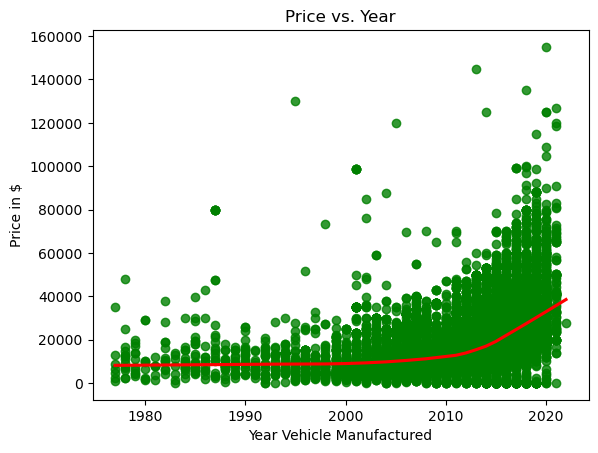

<Figure size 640x480 with 0 Axes>

In [109]:
# Explore relationships between variables using scatterplots
# Check for non-linear relationships

sns.regplot(data=df_encoded_final, x='year', y='price', 
            lowess=True, scatter=True, color='green', label='LOESS Fit',
           line_kws={"color": "red"})
plt.title("Price vs. Year")
plt.xlabel("Year Vehicle Manufactured")
plt.ylabel("Price in $")
plt.show()
plt.savefig('price_by_year_nonlinear_fit')

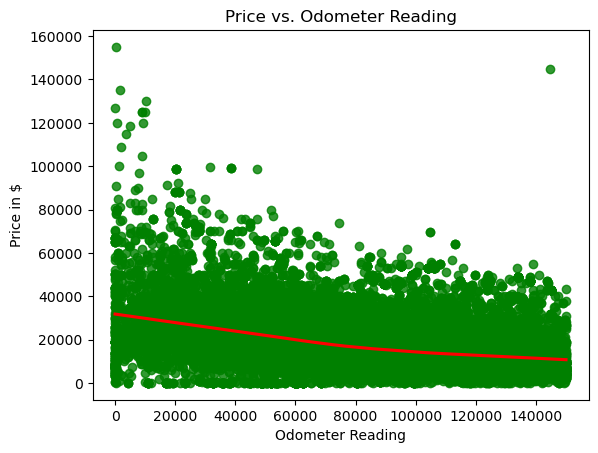

In [110]:
sns.regplot(data=df_encoded_final, x='odometer', y='price', 
            lowess=True, scatter=True, color='green', label='LOESS Fit',
           line_kws={"color": "red"})
plt.title("Price vs. Odometer Reading")
plt.xlabel("Odometer Reading")
plt.ylabel("Price in $")
plt.show()

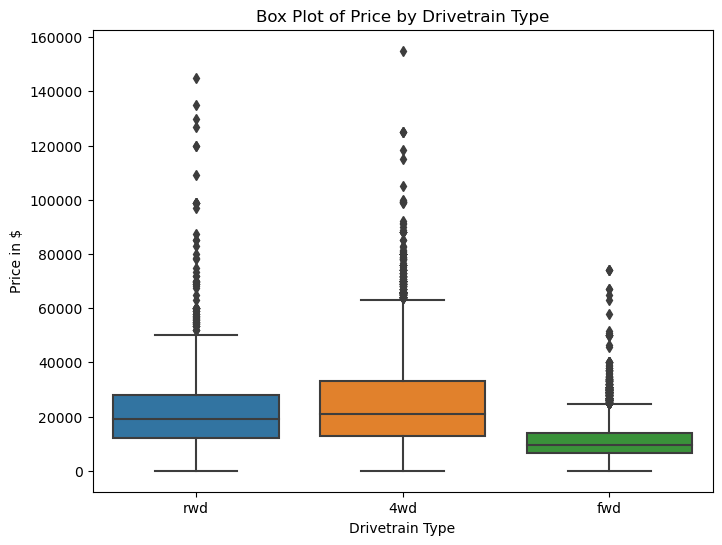

In [111]:
# Explore data using box plot

plt.figure(figsize=(8, 6))
sns.boxplot(x='drive', y='price', data=df_encoded_final)
plt.title('Box Plot of Price by Drivetrain Type')
plt.xlabel('Drivetrain Type')
plt.ylabel('Price in $')
plt.show()

In [112]:
# Drop certain variables to reduce dimensionality, based on data exploration
# Drop all paint columns, state columns, transmission, title_status, region

df_encoded_final = df_encoded_final.drop(['transmission', 'paint_color',
                                          'state', 'state_split', 'paint_split', 
                                          'paint_split_black', 'paint_split_other',
                                          'paint_split_silver_grey', 'paint_split_white',
                                          'state_split_colder_state', 'state_split_warmer_state',
                                          'transmission_automatic', 'transmission_manual', 
                                          'title_status', 'region'], axis=1)

df_encoded_final.reset_index()
df_encoded_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24202 entries, 219 to 426833
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             24202 non-null  int64  
 1   price                          24202 non-null  int64  
 2   year                           24202 non-null  float64
 3   manufacturer                   24202 non-null  object 
 4   model                          24202 non-null  object 
 5   condition                      24202 non-null  object 
 6   cylinders                      24202 non-null  object 
 7   fuel                           24202 non-null  object 
 8   odometer                       24202 non-null  float64
 9   drive                          24202 non-null  object 
 10  size                           24202 non-null  object 
 11  type                           24202 non-null  object 
 12  manufacturer_split             24202 non-null  o

In [120]:
# Create training, development and test data split

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
import random
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# df_encoded_final_shuffled = shuffle(df_encoded_final)
# # df_encoded_final_shuffled.info()

# train = df_encoded_final
# test = df_encoded_final.drop('price', axis = 1)

# X = train.drop('price', axis = 1)
# y = train['price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
# print(type(X_train), type(y_train))#should be DataFrame and Series


Degree 1: 84534844.76
Degree 2: 77739798.22
Degree 3: 76453689.47
Degree 4: 76450188.51
Degree 1: 84534844.76
Degree 2: 77739798.22
Degree 3: 76453689.47
Degree 4: 76450188.51
Degree 1: 84534844.76
Degree 2: 77739798.22
Degree 3: 76453689.47
Degree 4: 76450188.51
Degree 1: 84534844.76
Degree 2: 77739798.22
Degree 3: 76453689.47
Degree 4: 76450188.51
Degree 1: 84534844.76
Degree 2: 77739798.22
Degree 3: 76453689.47
Degree 4: 76450188.51
Degree 5: 76446751.83
Degree 1: 84534844.76
Degree 2: 77739798.22
Degree 3: 76453689.47
Degree 4: 76450188.51
Degree 5: 76446751.83
Degree 6: 127682990.98
Polynomial Regression MSEs for various degrees:
 Degree      Train MSE Validation MSE
      1  90657667.5321  86315661.8926
      2  83216296.2988  79716638.7798
      3  82229458.7184  78147803.0017
      4  82227916.9767  78144080.2105
      5  82226420.8207  78140393.3457
      6 134442208.1638 124517393.3528


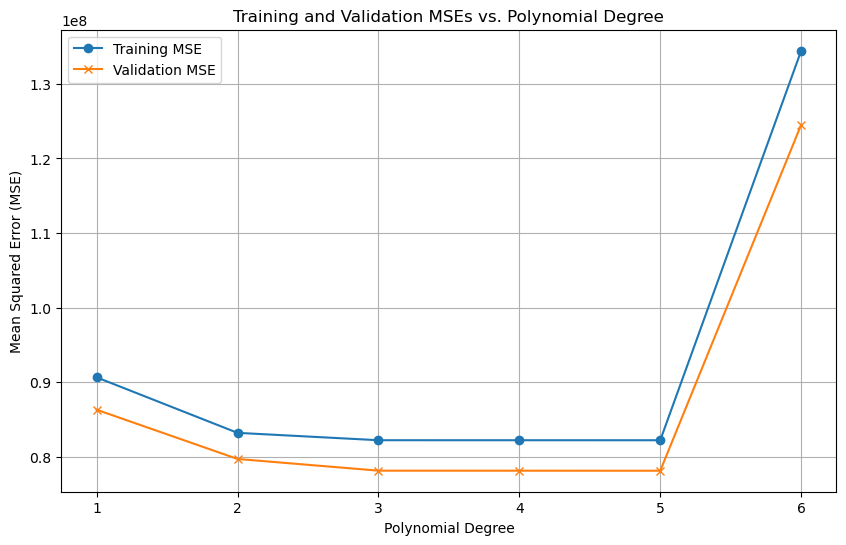

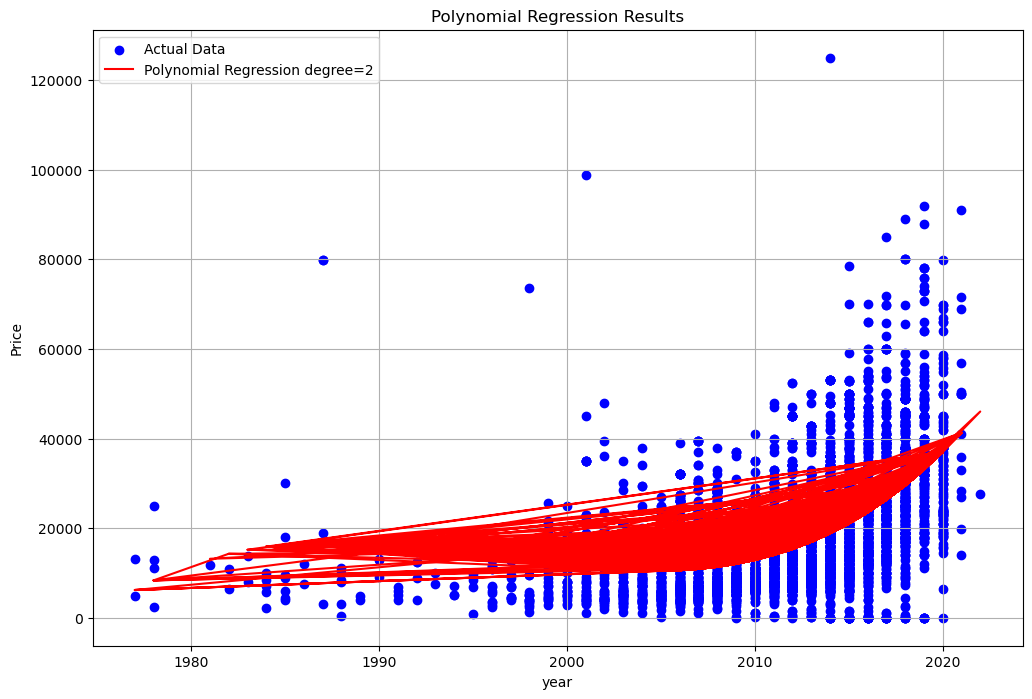

[14354.05247033]


In [158]:
# Create pipeline for polynomial models with different degrees.
# Polynomial feature is year, based on indication of non-linear
# relationship between year and price

# Define the features (X) and target (y)
# Select specific columns for polynomial features
polynomial_features_cols = ['year']

# Other features
other_features_cols = ['odometer', 'type_split_truck', 'drive_4wd']
target_col = ['price']

X = df_encoded_final[polynomial_features_cols + other_features_cols]
y = df_encoded_final[target_col]

# split into training + validation and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split training + validation into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 of 0.8 is 0.2 of total

degrees = range(1, 7)  # Test degrees 1 to 6
results = []

# Create preprocessor using ColumnTransformer
# This applies PolynomialFeatures to selected columns and StandardScaler to all numerical columns
for degree in degrees:
    preprocessor = ColumnTransformer(
        transformers=[
            ('poly', PolynomialFeatures(degree=degree, include_bias=False), polynomial_features_cols),
            ('scaler', StandardScaler(), polynomial_features_cols + other_features_cols) # Scale all numerical features after polynomial transformation
        ])
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
# predictions on the test data and MSE
    y_pred = pipeline.predict(X_test)
# Mean Squared Error test data
    mse = mean_squared_error(y_test, y_pred)
    mse_results[f'Degree {degree}'] = mse
    for degree_label, mse_value in mse_results.items():
        print(f"{degree_label}: {mse_value:.2f}")
# predictions on training data
    y_train_pred = pipeline.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
# Predict on validation data
    y_val_pred = pipeline.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    results.append({'Degree': degree, 'Train MSE': train_mse, 'Validation MSE': val_mse})
    
# results in a dataframe table
results_df = pd.DataFrame(results)
np.set_printoptions(suppress=True, precision=8) # suppress=True prevents scientific notation
print("Polynomial Regression MSEs for various degrees:")
# print(results_df.to_markdown(index=False))
print(results_df.to_string(index=False, formatters={'Training MSE': '{:.4f}'.format, 'Validation MSE': '{:.4f}'.format}))

# Plot the table (MSEs vs. Degree)
plt.figure(figsize=(10, 6))
plt.plot(results_df['Degree'], results_df['Train MSE'], label='Training MSE', marker='o')
plt.plot(results_df['Degree'], results_df['Validation MSE'], label='Validation MSE', marker='x')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSEs vs. Polynomial Degree')
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()


# Plot the results for year
plt.figure(figsize=(12, 8))
plt.scatter(X_test['year'], y_test, color='blue', label='Actual Data')
plt.plot(X_test['year'], y_pred, color='red', label=f'Polynomial Regression degree=2')
plt.title('Polynomial Regression Results')
plt.xlabel('year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# I think the data needs to be smoothed somehow to make the plot nicer
# I do not know how to do that

# Predictions with new data
new_data = pd.DataFrame({
    'year': [1995],
    'odometer': [60000],
    'type_split_truck': [0],
    'drive_4wd': [0]
})
predicted_target = pipeline.predict(new_data)
print(predicted_target[0])